In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [20]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 14410

beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 2.4e-6,
    'sigma_y': 2.4e-6,
    'z0x': 70,
    'z0y': 70,
    'rangeFactor': 5,
    'scaleFactor': 5
}

In [21]:
b1 = beam.Beam(beam_params=beam_params)

# mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
# mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)

crystal1 = optics.Crystal('c1', hkl=[11,5,3], length=3e-2, width=25e-3, z=990, E0=E0,alphaAsym=-78.4*np.pi/180, orientation=2)

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.1, E0=E0,alphaAsym=-78.4*np.pi/180, 
                          orientation=0)
crystal3 = optics.Crystal('c3', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.4, E0=E0,alphaAsym=78.4*np.pi/180, orientation=2,
                         asym_type='emergence')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.5, E0=E0,alphaAsym=78.4*np.pi/180, 
                          asym_type='emergence', orientation=0)
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

# crl1 = optics.CRL('crlx', z=990.5, roc=7e-6)
# crl2 = optics.CRL('crly', z=990.5,orientation=1, roc=7e-6)
# slit = optics.Slit('slit', z=990.6, x_width=30e-6, y_width=100e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

# IP = optics.PPM('IP', FOV=50e-6, z=991.43, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=slit.z + .05, N=256)

YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 6.5, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)


devices = [slit, upstream_YAG, downstream_YAG, YAG_mid, crystal1,crystal2,crystal3,crystal4]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal1.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 942.7110483611997 microns
FWHM in y: 942.7110483611997 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028807806145045
0.21028807806145045
9.913396083622544
158.87993469935145
2.184505753638252
(array([0., 0., 0.]), array([ 0.36049263,  0.        , -0.93276206]))
3.452485144369975e-06


slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.11
zy: 70.10
drift3
zx: -6889.01
zy: 70.20
c2
zx: 677020.08
zy: 70.20
drift4
zx: 677020.18
zy: 70.30
YAG_mid
zx: 677020.18
zy: 70.30
drift5
zx: 677020.38
zy: 70.50
c3
zx: -7576.48
zy: 70.50
drift6
zx: -7576.38
zy: 70.60
c4
zx: 84.79
zy: 70.60
drift7
zx: 91.29
zy: 77.10
YAG2
zx: 91.29
zy: 77.10


<IPython.core.display.Javascript object>


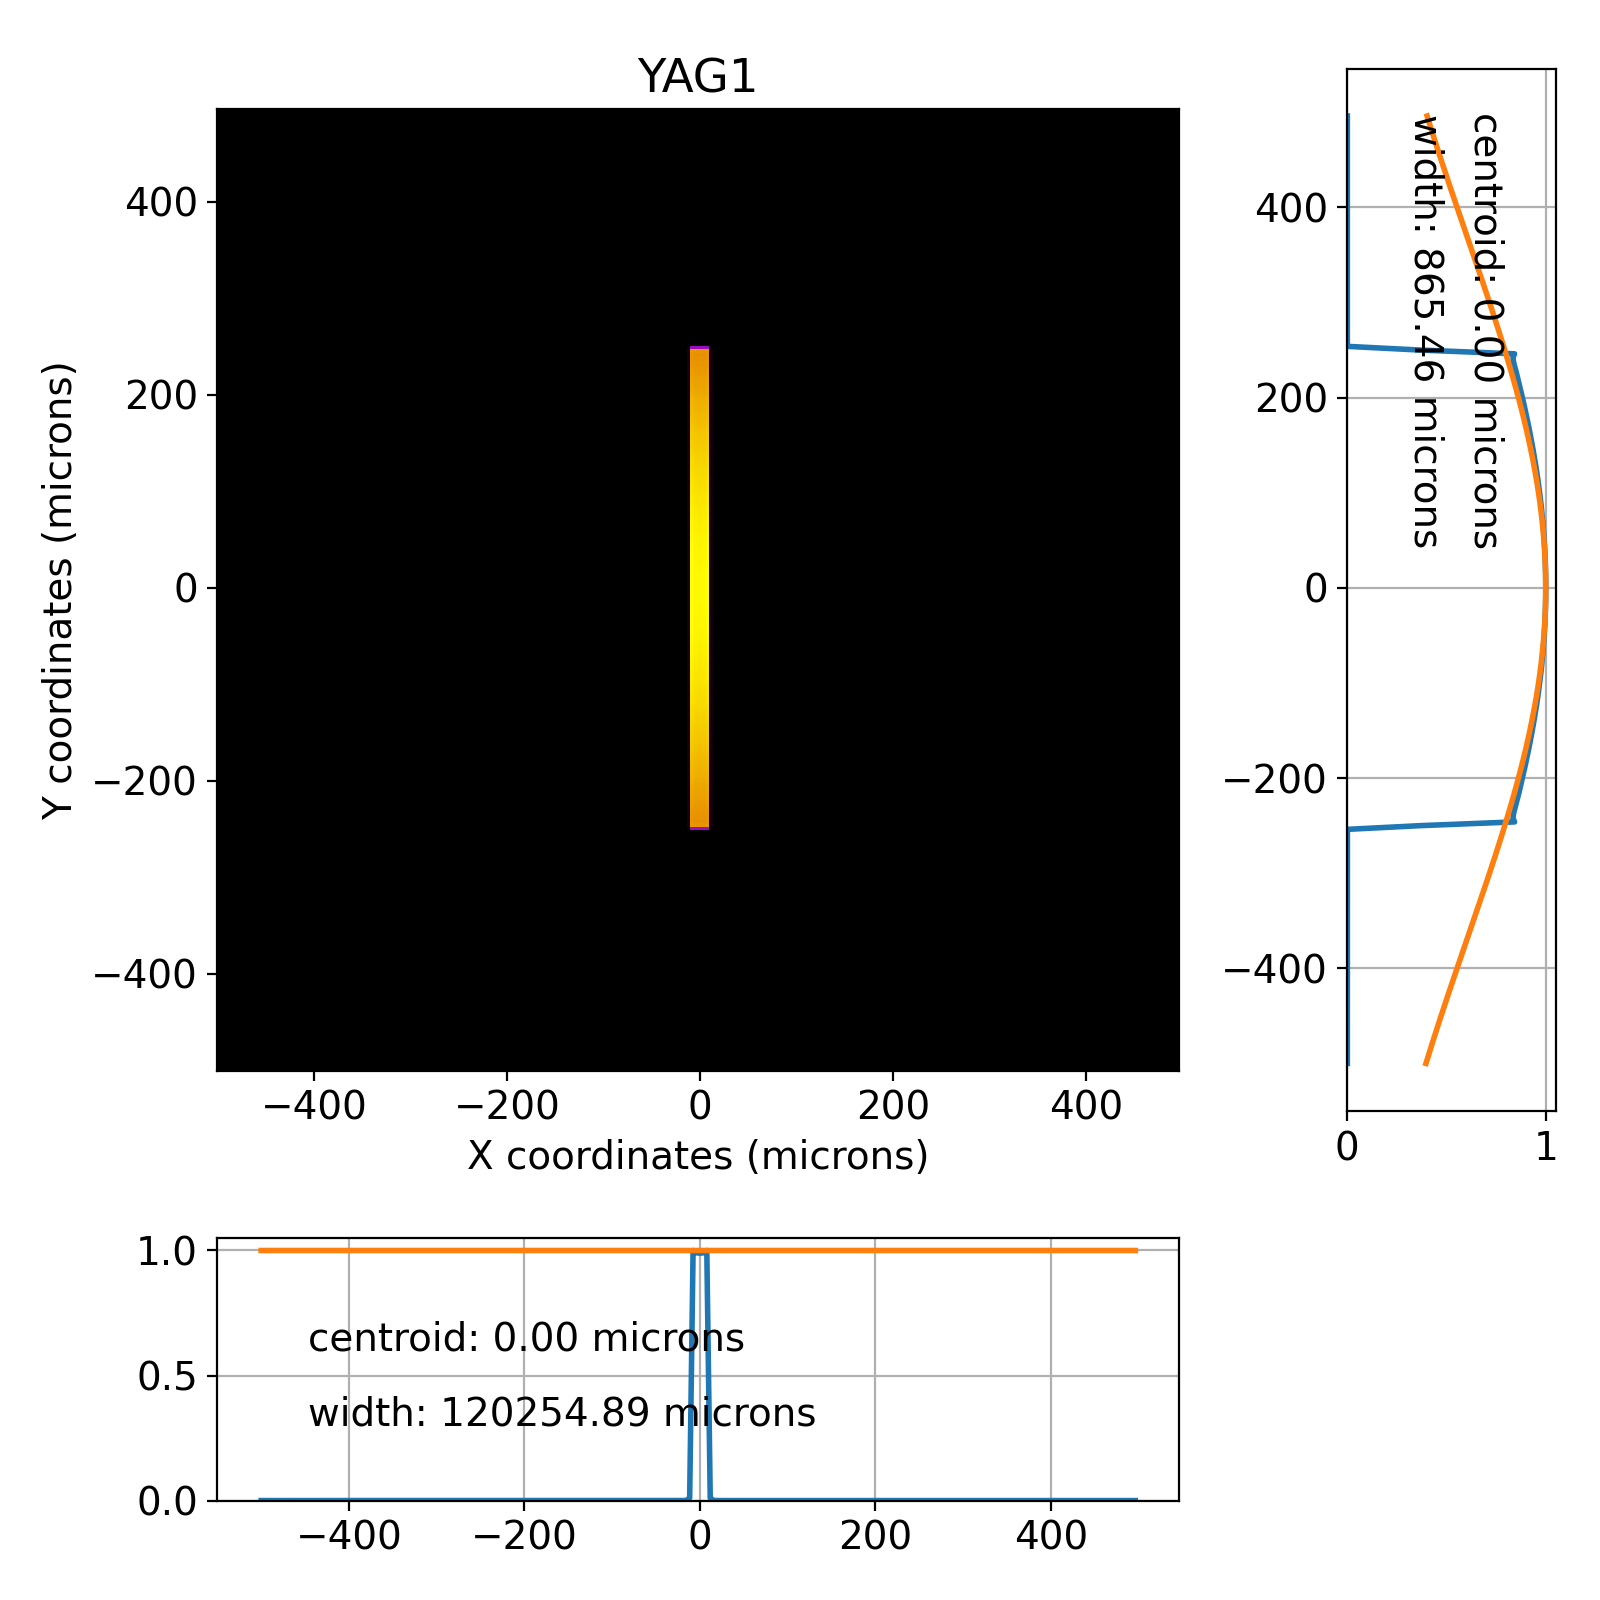

<IPython.core.display.Javascript object>


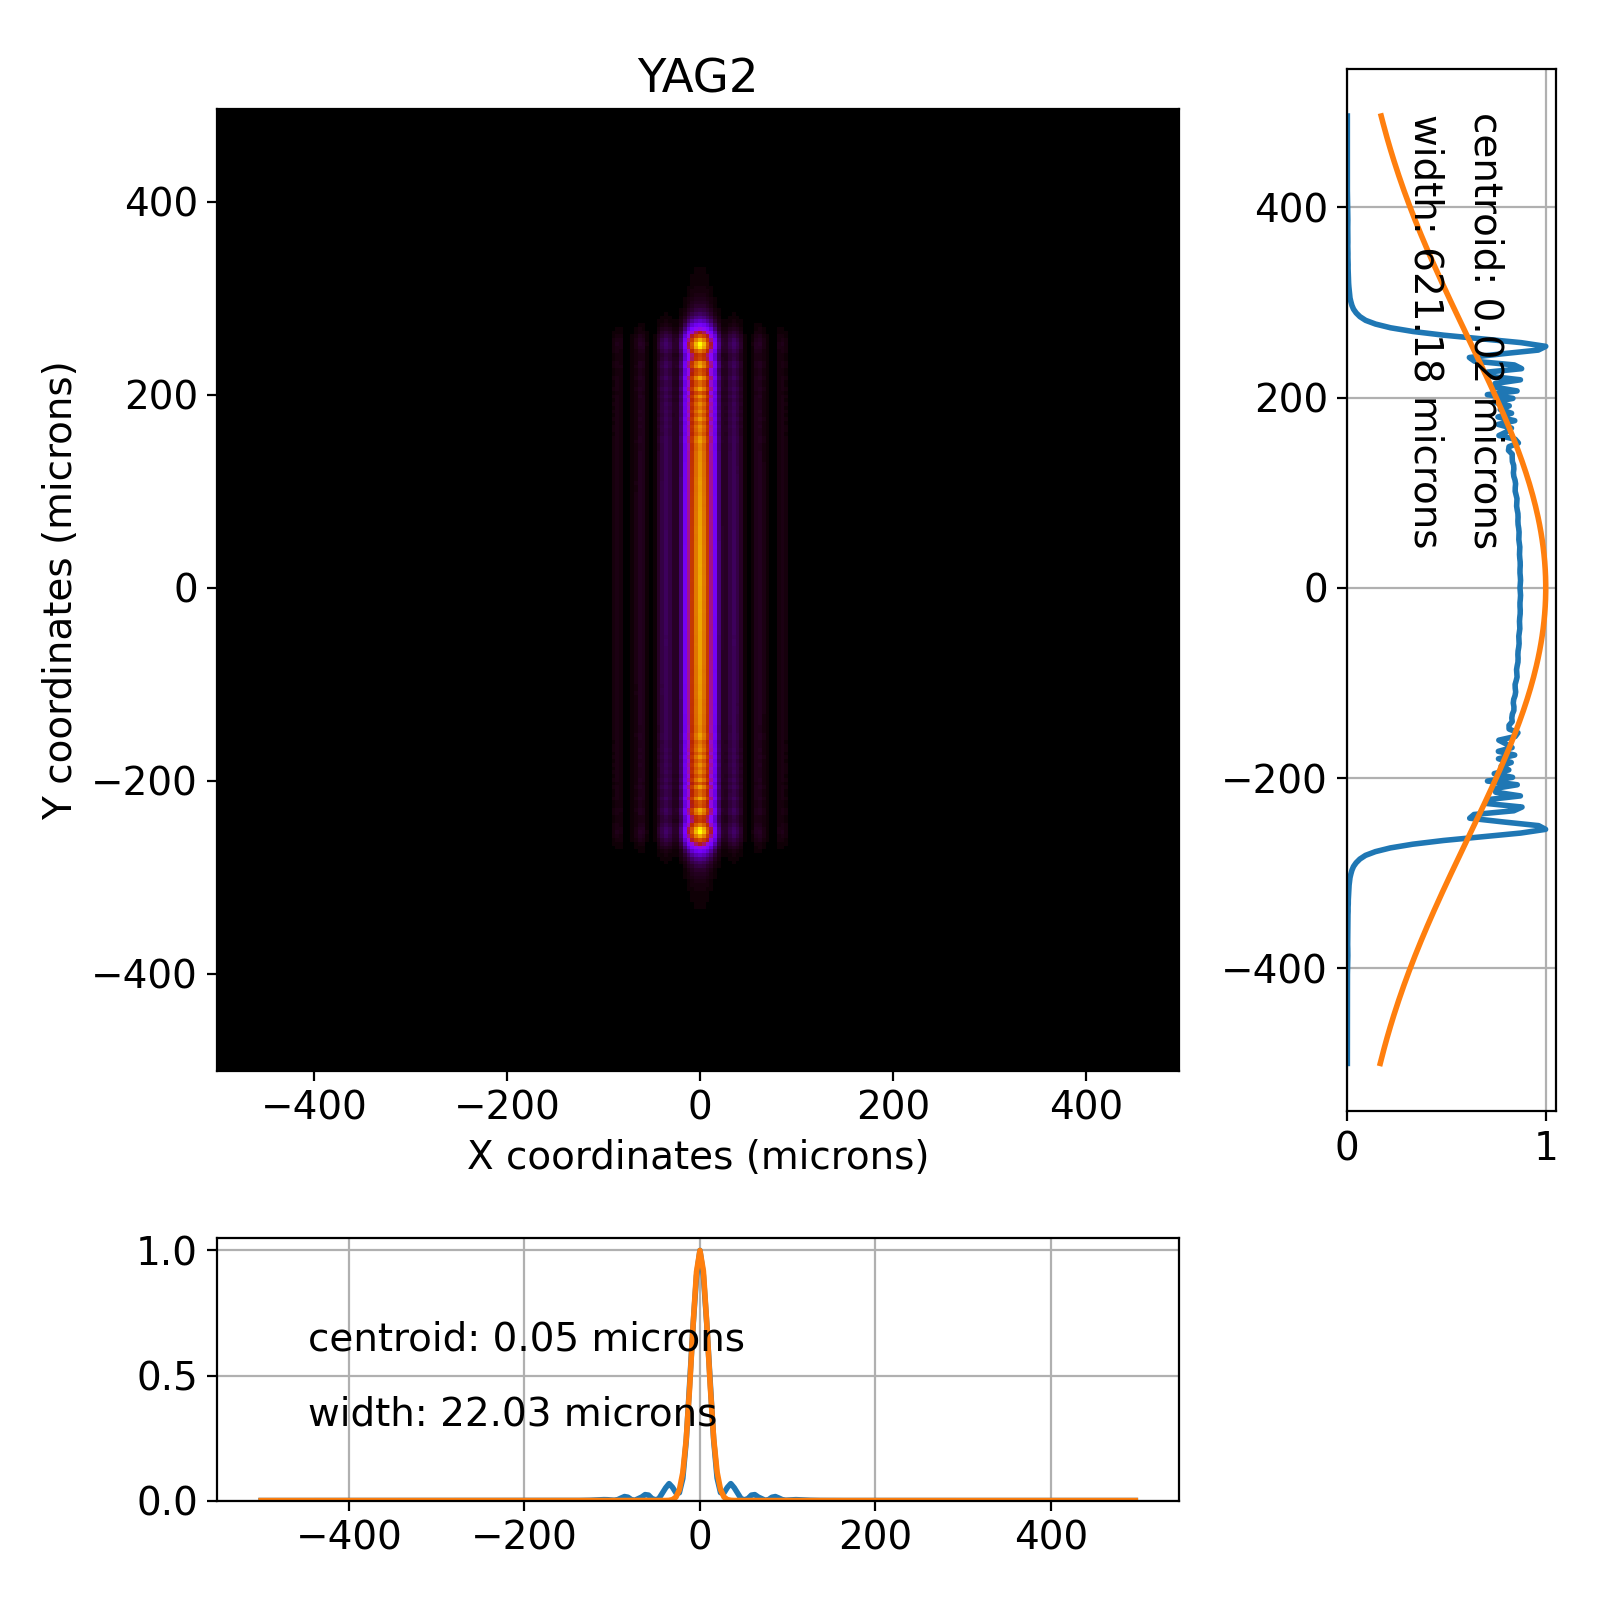

<IPython.core.display.Javascript object>


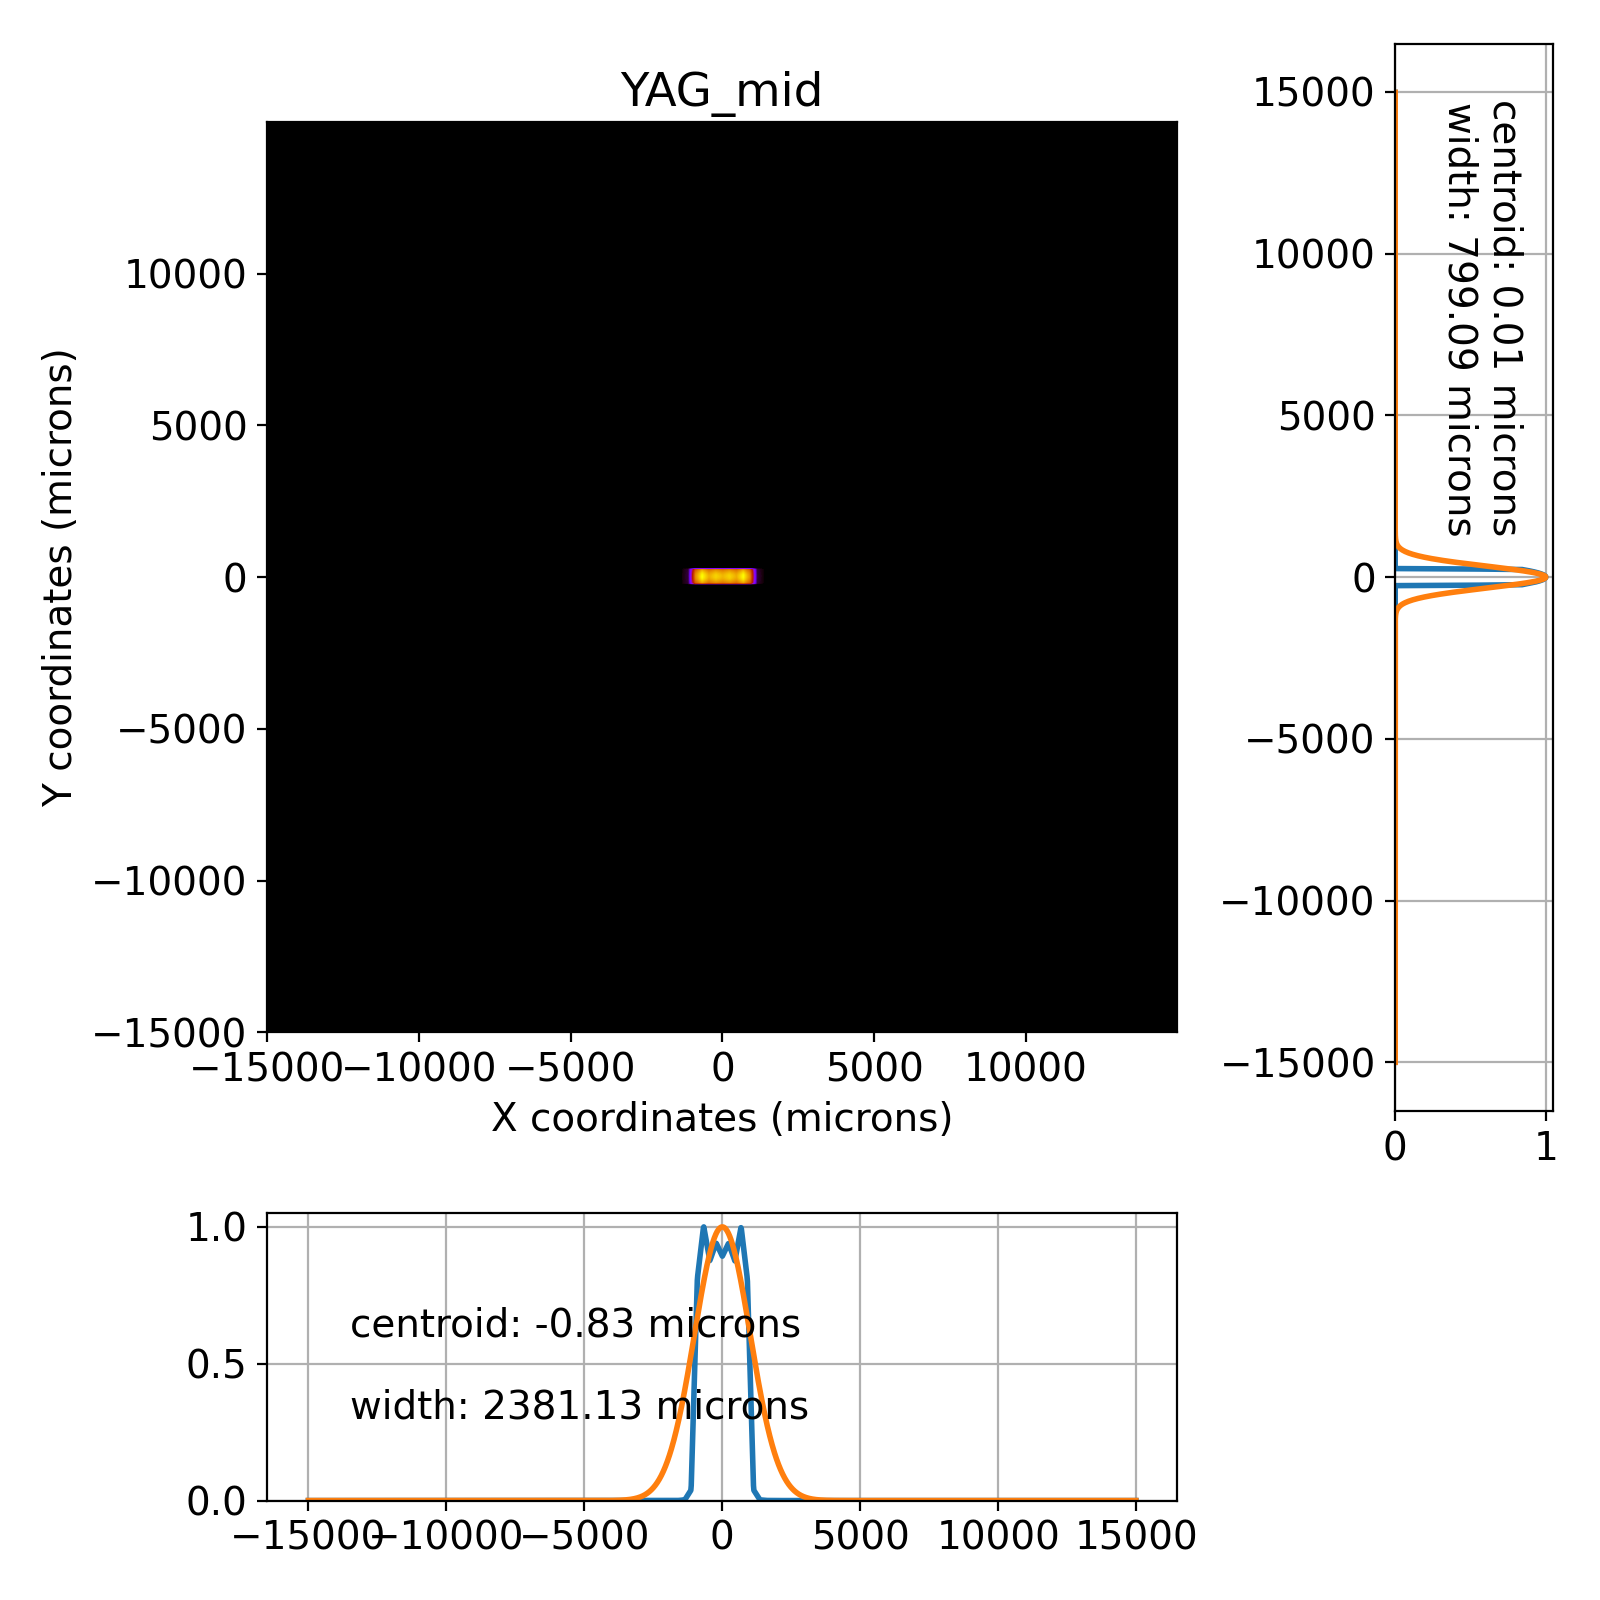

<IPython.core.display.Javascript object>


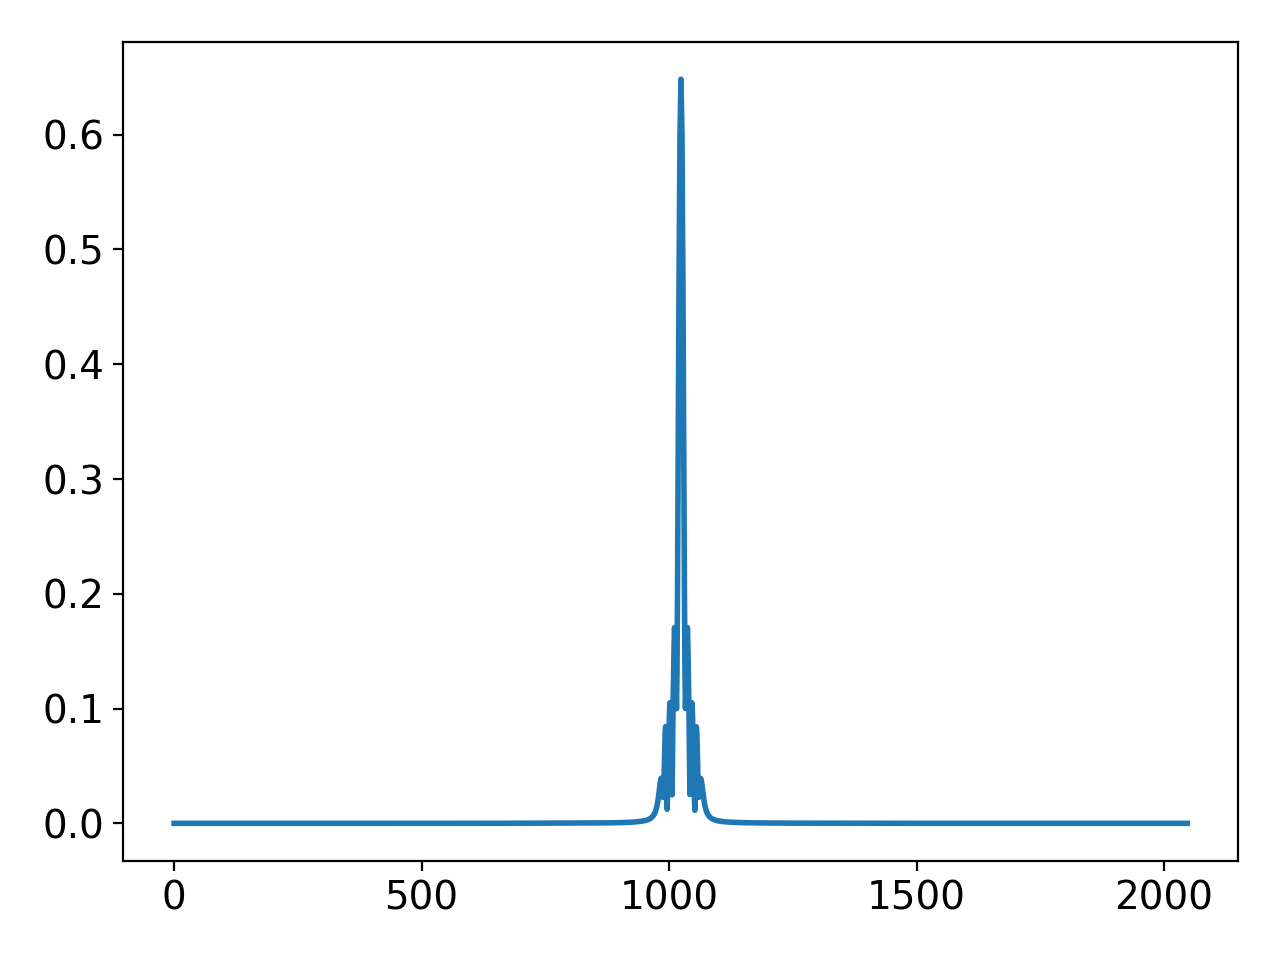

In [22]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.YAG2.view_beam()
XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [23]:
beam_params['photonEnergy'] = 14410

pulse_test = beam.Pulse(beam_params=beam_params, tau=1000, time_window=80000)

In [24]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1', 'YAG2'])

FWHM in x: 942.7113525531333 microns
FWHM in y: 942.7113525531333 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028801020556412
0.21028801020556412
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.08
zy: 70.10
drift3
zx: -6888.98
zy: 70.20
c2
zx: 677044.34
zy: 70.20
drift4
zx: 677044.44
zy: 70.30
YAG_mid
zx: 677044.44
zy: 70.30
drift5
zx: 677044.64
zy: 70.50
c3
zx: -7570.43
zy: 70.50
drift6
zx: -7570.33
zy: 70.60
c4
zx: 85.05
zy: 70.60
drift7
zx: 91.55
zy: 77.10
YAG2
zx: 91.55
zy: 77.10
FWHM in x: 942.7113491352453 microns
FWHM in y: 942.7113491352453 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.2102880109679898
0.2102880109679898
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.08
zy: 70.10
drift3
zx: -6888.98
zy: 70.20
c2
zx: 677044.06
zy: 70.20
drift4
zx: 677044.16
zy: 70.30
YAG_mid
zx: 677044.1

slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.08
zy: 70.10
drift3
zx: -6888.98
zy: 70.20
c2
zx: 677039.97
zy: 70.20
drift4
zx: 677040.07
zy: 70.30
YAG_mid
zx: 677040.07
zy: 70.30
drift5
zx: 677040.27
zy: 70.50
c3
zx: -7571.52
zy: 70.50
drift6
zx: -7571.42
zy: 70.60
c4
zx: 85.01
zy: 70.60
drift7
zx: 91.51
zy: 77.10
YAG2
zx: 91.51
zy: 77.10
FWHM in x: 942.7112944490409 microns
FWHM in y: 942.7112944490409 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028802316680084
0.21028802316680084
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.08
zy: 70.10
drift3
zx: -6888.98
zy: 70.20
c2
zx: 677039.70
zy: 70.20
drift4
zx: 677039.80
zy: 70.30
YAG_mid
zx: 677039.80
zy: 70.30
drift5
zx: 677040.00
zy: 70.50
c3
zx: -7571.59
zy: 70.50
drift6
zx: -7571.49
zy: 70.60
c4
zx: 85.00
zy: 70.60
drift7
zx: 91.50
zy: 77.10
YAG2
zx: 91.50
zy: 77.10


zx: 677035.71
zy: 70.30
drift5
zx: 677035.91
zy: 70.50
c3
zx: -7572.61
zy: 70.50
drift6
zx: -7572.51
zy: 70.60
c4
zx: 84.96
zy: 70.60
drift7
zx: 91.46
zy: 77.10
YAG2
zx: 91.46
zy: 77.10
FWHM in x: 942.7112397628432 microns
FWHM in y: 942.7112397628432 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.2102880353656118
0.2102880353656118
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.09
zy: 70.10
drift3
zx: -6888.99
zy: 70.20
c2
zx: 677035.35
zy: 70.20
drift4
zx: 677035.45
zy: 70.30
YAG_mid
zx: 677035.45
zy: 70.30
drift5
zx: 677035.65
zy: 70.50
c3
zx: -7572.67
zy: 70.50
drift6
zx: -7572.57
zy: 70.60
c4
zx: 84.95
zy: 70.60
drift7
zx: 91.45
zy: 77.10
YAG2
zx: 91.45
zy: 77.10
FWHM in x: 942.7112363449558 microns
FWHM in y: 942.7112363449558 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028803612803754
0.21028803612803754
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05


zx: 677031.35
zy: 70.30
drift5
zx: 677031.55
zy: 70.50
c3
zx: -7573.69
zy: 70.50
drift6
zx: -7573.59
zy: 70.60
c4
zx: 84.91
zy: 70.60
drift7
zx: 91.41
zy: 77.10
YAG2
zx: 91.41
zy: 77.10
FWHM in x: 942.711185076651 microns
FWHM in y: 942.711185076651 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028804756442288
0.21028804756442288
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.09
zy: 70.10
drift3
zx: -6888.99
zy: 70.20
c2
zx: 677030.98
zy: 70.20
drift4
zx: 677031.08
zy: 70.30
YAG_mid
zx: 677031.08
zy: 70.30
drift5
zx: 677031.28
zy: 70.50
c3
zx: -7573.76
zy: 70.50
drift6
zx: -7573.66
zy: 70.60
c4
zx: 84.91
zy: 70.60
drift7
zx: 91.41
zy: 77.10
YAG2
zx: 91.41
zy: 77.10
FWHM in x: 942.7111816587643 microns
FWHM in y: 942.7111816587643 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028804832684858
0.21028804832684858
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05


zx: 677026.62
zy: 70.20
drift4
zx: 677026.72
zy: 70.30
YAG_mid
zx: 677026.72
zy: 70.30
drift5
zx: 677026.92
zy: 70.50
c3
zx: -7574.85
zy: 70.50
drift6
zx: -7574.75
zy: 70.60
c4
zx: 84.86
zy: 70.60
drift7
zx: 91.36
zy: 77.10
YAG2
zx: 91.36
zy: 77.10
FWHM in x: 942.7111269725796 microns
FWHM in y: 942.7111269725796 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028806052565957
0.21028806052565957
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.10
zy: 70.10
drift3
zx: -6889.00
zy: 70.20
c2
zx: 677026.35
zy: 70.20
drift4
zx: 677026.45
zy: 70.30
YAG_mid
zx: 677026.45
zy: 70.30
drift5
zx: 677026.65
zy: 70.50
c3
zx: -7574.91
zy: 70.50
drift6
zx: -7574.81
zy: 70.60
c4
zx: 84.86
zy: 70.60
drift7
zx: 91.36
zy: 77.10
YAG2
zx: 91.36
zy: 77.10
FWHM in x: 942.7111235546932 microns
FWHM in y: 942.7111235546932 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028806128808528
0.21028

zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.10
zy: 70.10
drift3
zx: -6889.00
zy: 70.20
c2
zx: 677022.26
zy: 70.20
drift4
zx: 677022.36
zy: 70.30
YAG_mid
zx: 677022.36
zy: 70.30
drift5
zx: 677022.56
zy: 70.50
c3
zx: -7575.93
zy: 70.50
drift6
zx: -7575.83
zy: 70.60
c4
zx: 84.81
zy: 70.60
drift7
zx: 91.31
zy: 77.10
YAG2
zx: 91.31
zy: 77.10
FWHM in x: 942.711072286401 microns
FWHM in y: 942.711072286401 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028807272447061
0.21028807272447061
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.10
zy: 70.10
drift3
zx: -6889.00
zy: 70.20
c2
zx: 677021.99
zy: 70.20
drift4
zx: 677022.09
zy: 70.30
YAG_mid
zx: 677022.09
zy: 70.30
drift5
zx: 677022.29
zy: 70.50
c3
zx: -7576.00
zy: 70.50
drift6
zx: -7575.90
zy: 70.60
c4
zx: 84.81
zy: 70.60
drift7
zx: 91.31
zy: 77.10
YAG2
zx: 91.31
zy: 77.10
FWHM in x: 942.7110688685148 micro

zx: -6889.01
zy: 70.20
c2
zx: 677017.90
zy: 70.20
drift4
zx: 677018.00
zy: 70.30
YAG_mid
zx: 677018.00
zy: 70.30
drift5
zx: 677018.20
zy: 70.50
c3
zx: -7577.02
zy: 70.50
drift6
zx: -7576.92
zy: 70.60
c4
zx: 84.76
zy: 70.60
drift7
zx: 91.26
zy: 77.10
YAG2
zx: 91.26
zy: 77.10
FWHM in x: 942.7110176002284 microns
FWHM in y: 942.7110176002284 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028808492328166
0.21028808492328166
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.11
zy: 70.10
drift3
zx: -6889.01
zy: 70.20
c2
zx: 677017.62
zy: 70.20
drift4
zx: 677017.72
zy: 70.30
YAG_mid
zx: 677017.72
zy: 70.30
drift5
zx: 677017.92
zy: 70.50
c3
zx: -7577.09
zy: 70.50
drift6
zx: -7576.99
zy: 70.60
c4
zx: 84.76
zy: 70.60
drift7
zx: 91.26
zy: 77.10
YAG2
zx: 91.26
zy: 77.10
FWHM in x: 942.7110141823432 microns
FWHM in y: 942.7110141823432 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0

zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.12
zy: 70.10
drift3
zx: -6889.02
zy: 70.20
c2
zx: 677013.53
zy: 70.20
drift4
zx: 677013.63
zy: 70.30
YAG_mid
zx: 677013.63
zy: 70.30
drift5
zx: 677013.83
zy: 70.50
c3
zx: -7578.10
zy: 70.50
drift6
zx: -7578.00
zy: 70.60
c4
zx: 84.71
zy: 70.60
drift7
zx: 91.21
zy: 77.10
YAG2
zx: 91.21
zy: 77.10
FWHM in x: 942.7109629140626 microns
FWHM in y: 942.7109629140626 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028809712209268
0.21028809712209268
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.12
zy: 70.10
drift3
zx: -6889.02
zy: 70.20
c2
zx: 677013.26
zy: 70.20
drift4
zx: 677013.36
zy: 70.30
YAG_mid
zx: 677013.36
zy: 70.30
drift5
zx: 677013.56
zy: 70.50
c3
zx: -7578.17
zy: 70.50
drift6
zx: -7578.07
zy: 70.60
c4
zx: 84.71
zy: 70.60
drift7
zx: 91.21
zy: 77.10
YAG2
zx: 91.21
zy: 77.10
FWHM in x: 942.7109594961773 microns
FWHM in y: 942.71095

FWHM in x: 942.710908227903 microns
FWHM in y: 942.710908227903 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.2102881093209037
0.2102881093209037
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.12
zy: 70.10
drift3
zx: -6889.02
zy: 70.20
c2
zx: 677008.90
zy: 70.20
drift4
zx: 677009.00
zy: 70.30
YAG_mid
zx: 677009.00
zy: 70.30
drift5
zx: 677009.20
zy: 70.50
c3
zx: -7579.26
zy: 70.50
drift6
zx: -7579.16
zy: 70.60
c4
zx: 84.66
zy: 70.60
drift7
zx: 91.16
zy: 77.10
YAG2
zx: 91.16
zy: 77.10
FWHM in x: 942.7109048100182 microns
FWHM in y: 942.7109048100182 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028811008332937
0.21028811008332937
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.12
zy: 70.10
drift3
zx: -6889.02
zy: 70.20
c2
zx: 677008.63
zy: 70.20
drift4
zx: 677008.73
zy: 70.30
YAG_mid
zx: 677008.73


zx: 677004.65
zy: 70.30
drift5
zx: 677004.85
zy: 70.50
c3
zx: -7580.34
zy: 70.50
drift6
zx: -7580.24
zy: 70.60
c4
zx: 84.61
zy: 70.60
drift7
zx: 91.11
zy: 77.10
YAG2
zx: 91.11
zy: 77.10
FWHM in x: 942.7108501238654 microns
FWHM in y: 942.7108501238654 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.2102881222821404
0.2102881222821404
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.13
zy: 70.10
drift3
zx: -6889.03
zy: 70.20
c2
zx: 677004.27
zy: 70.20
drift4
zx: 677004.37
zy: 70.30
YAG_mid
zx: 677004.37
zy: 70.30
drift5
zx: 677004.57
zy: 70.50
c3
zx: -7580.41
zy: 70.50
drift6
zx: -7580.31
zy: 70.60
c4
zx: 84.61
zy: 70.60
drift7
zx: 91.11
zy: 77.10
YAG2
zx: 91.11
zy: 77.10
FWHM in x: 942.7108467059809 microns
FWHM in y: 942.7108467059809 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028812304456612
0.21028812304456612
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05


zx: 676999.90
zy: 70.20
drift4
zx: 677000.00
zy: 70.30
YAG_mid
zx: 677000.00
zy: 70.30
drift5
zx: 677000.20
zy: 70.50
c3
zx: -7581.49
zy: 70.50
drift6
zx: -7581.39
zy: 70.60
c4
zx: 84.56
zy: 70.60
drift7
zx: 91.06
zy: 77.10
YAG2
zx: 91.06
zy: 77.10
FWHM in x: 942.710792019835 microns
FWHM in y: 942.710792019835 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.2102881352433771
0.2102881352433771
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -6889.13
zy: 70.10
drift3
zx: -6889.03
zy: 70.20
c2
zx: 676999.63
zy: 70.20
drift4
zx: 676999.73
zy: 70.30
YAG_mid
zx: 676999.73
zy: 70.30
drift5
zx: 676999.93
zy: 70.50
c3
zx: -7581.56
zy: 70.50
drift6
zx: -7581.46
zy: 70.60
c4
zx: 84.56
zy: 70.60
drift7
zx: 91.06
zy: 77.10
YAG2
zx: 91.06
zy: 77.10
FWHM in x: 942.710788601951 microns
FWHM in y: 942.710788601951 microns
FWHM Divergence (x): 13.5 μrad
FWHM Divergence (y): 13.5 μrad
0.21028813600580282
0.21028813600

<IPython.core.display.Javascript object>


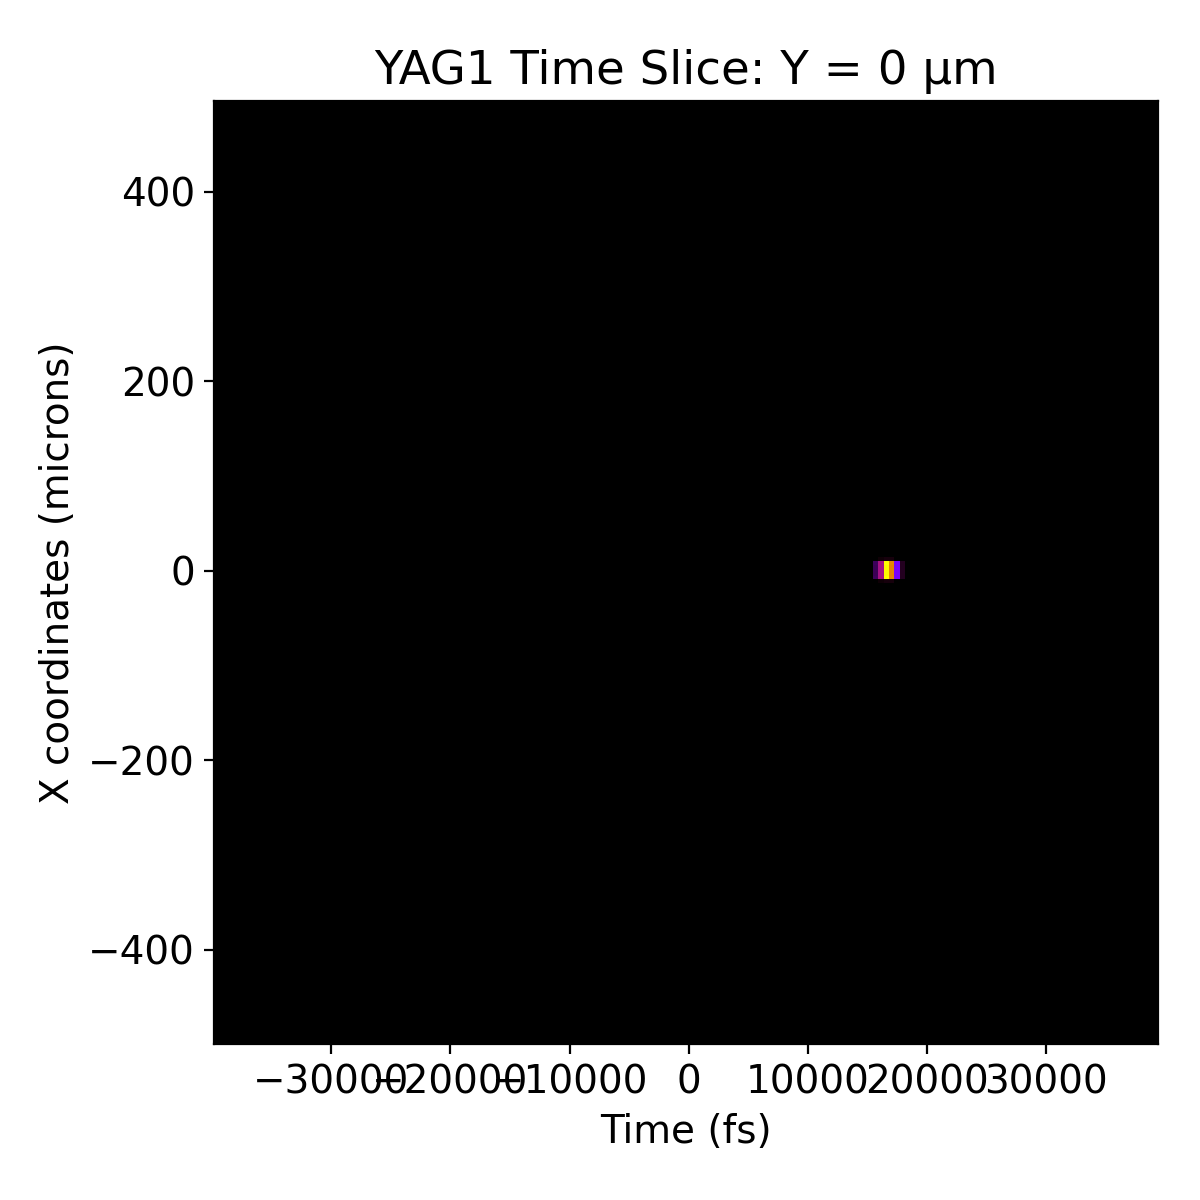

128


<IPython.core.display.Javascript object>


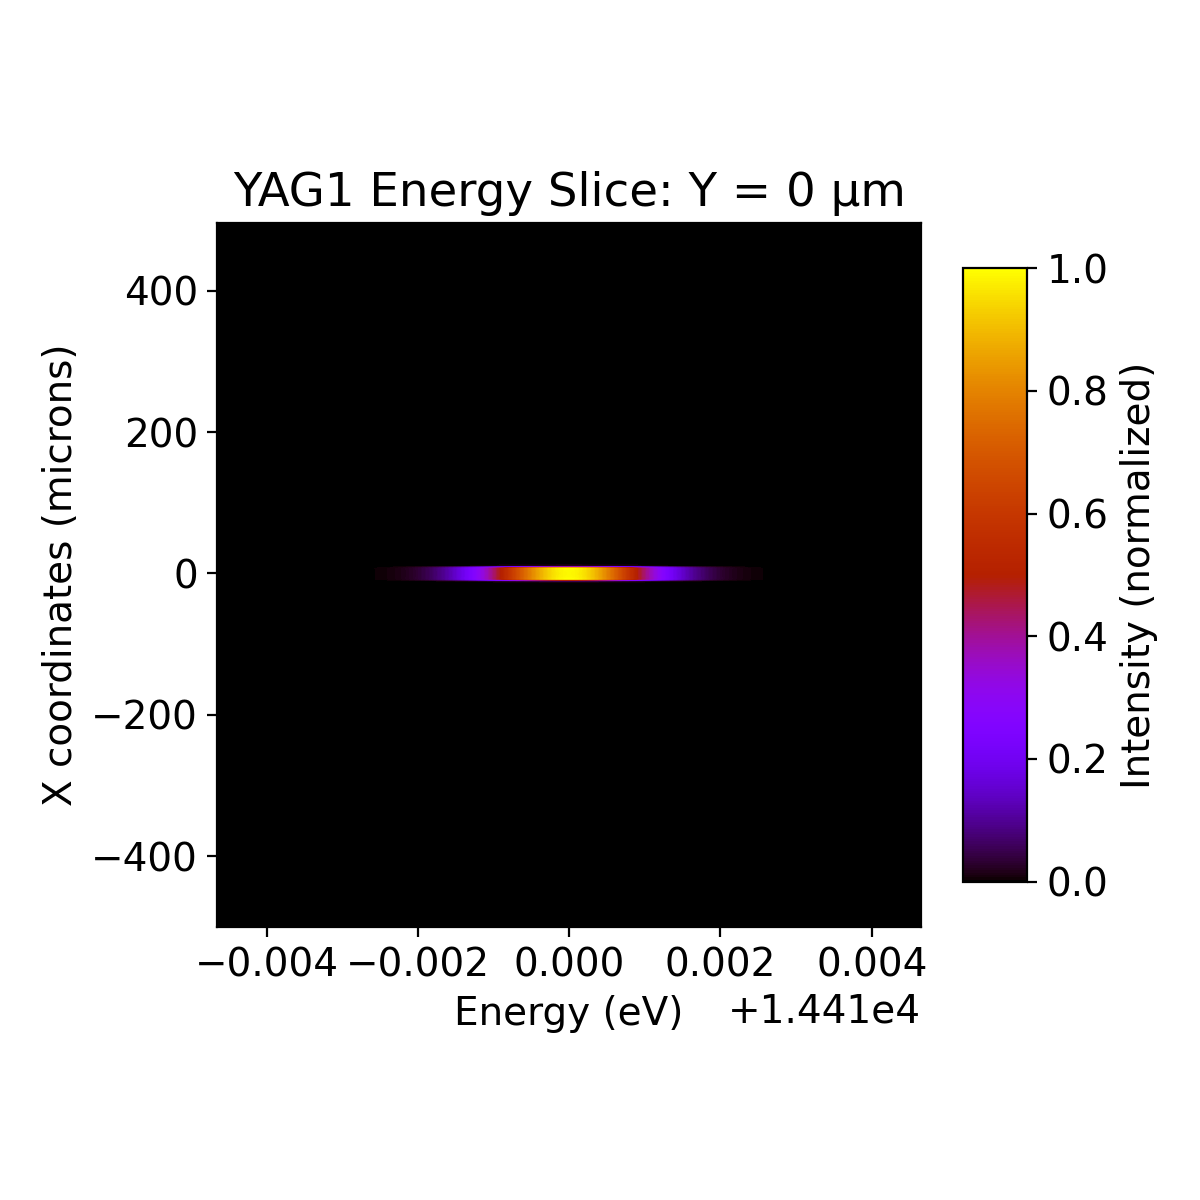

<IPython.core.display.Javascript object>


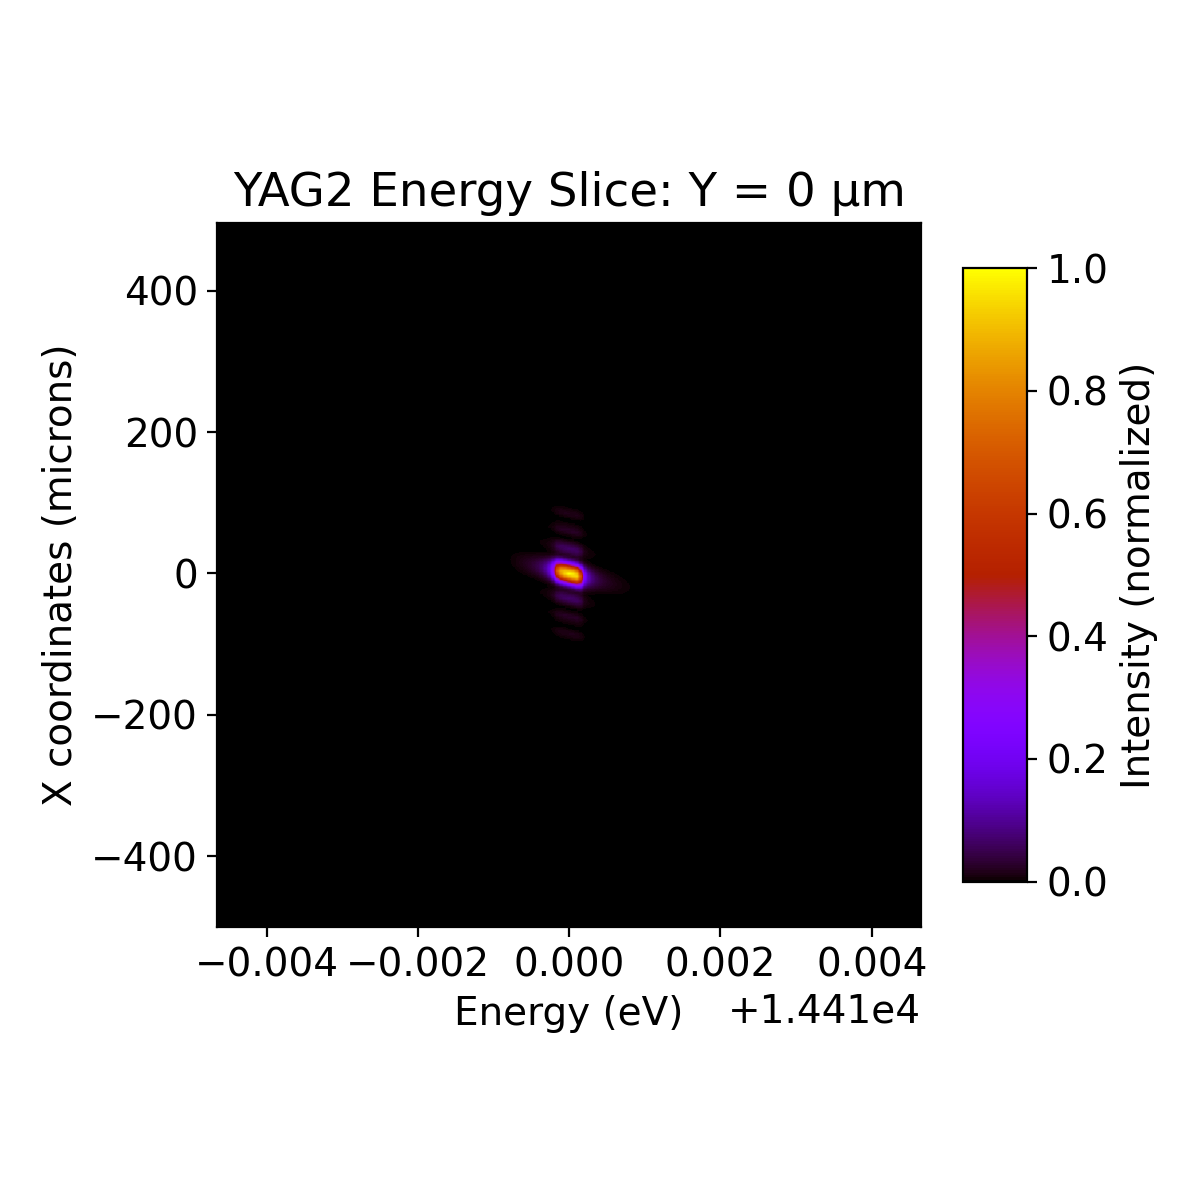

<IPython.core.display.Javascript object>


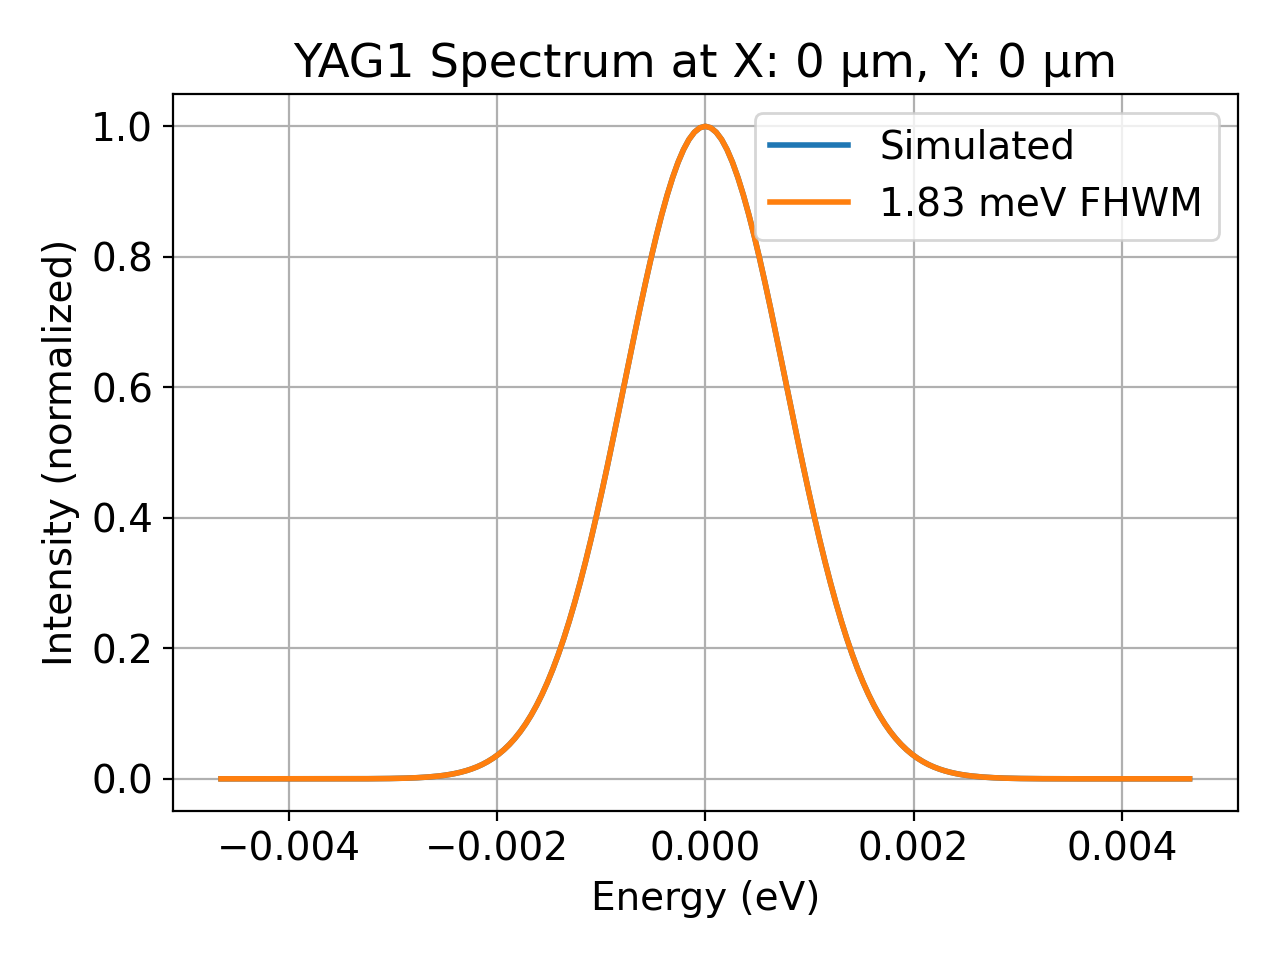

<IPython.core.display.Javascript object>


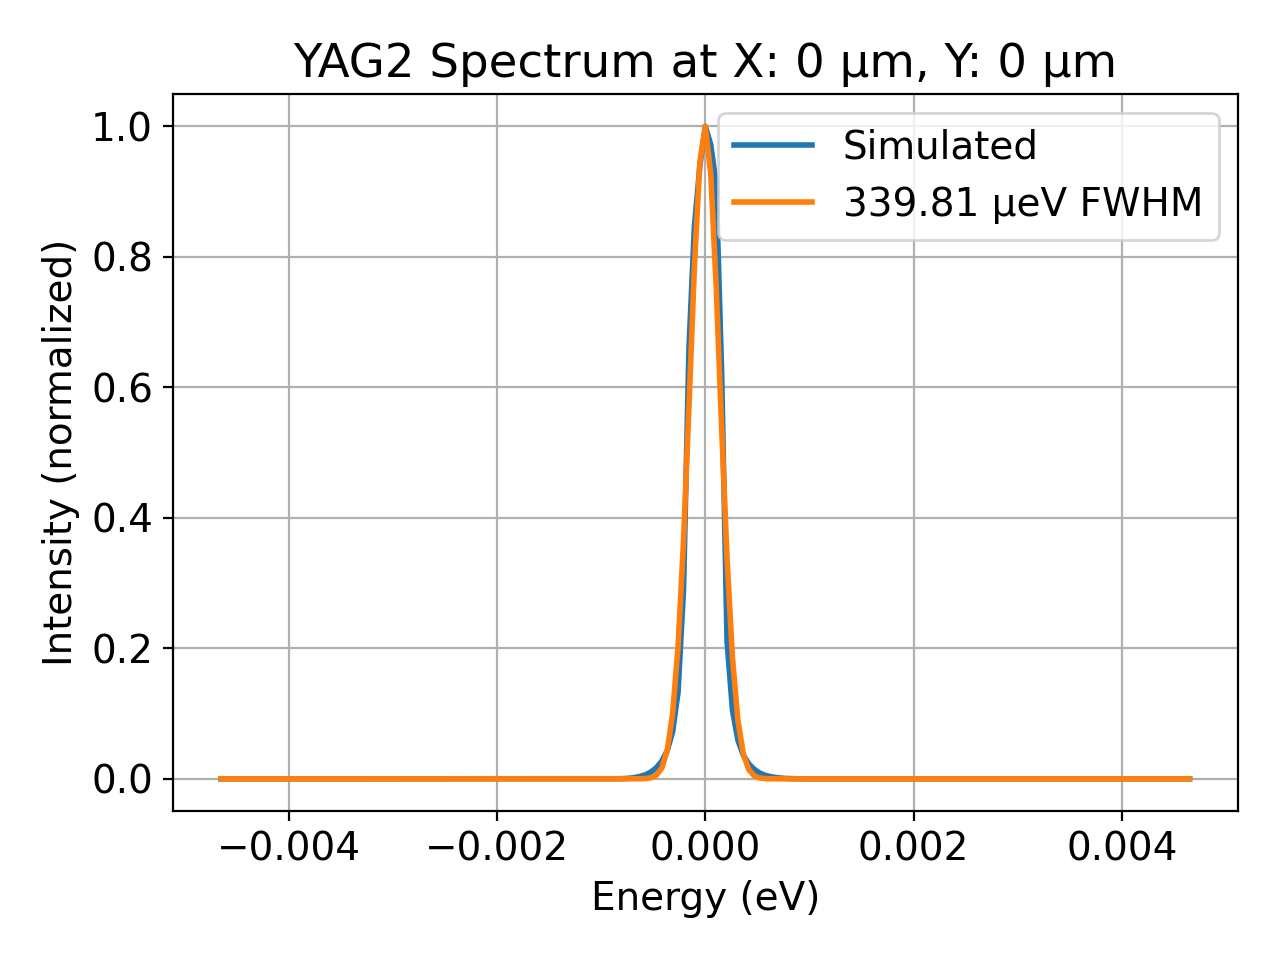

<IPython.core.display.Javascript object>


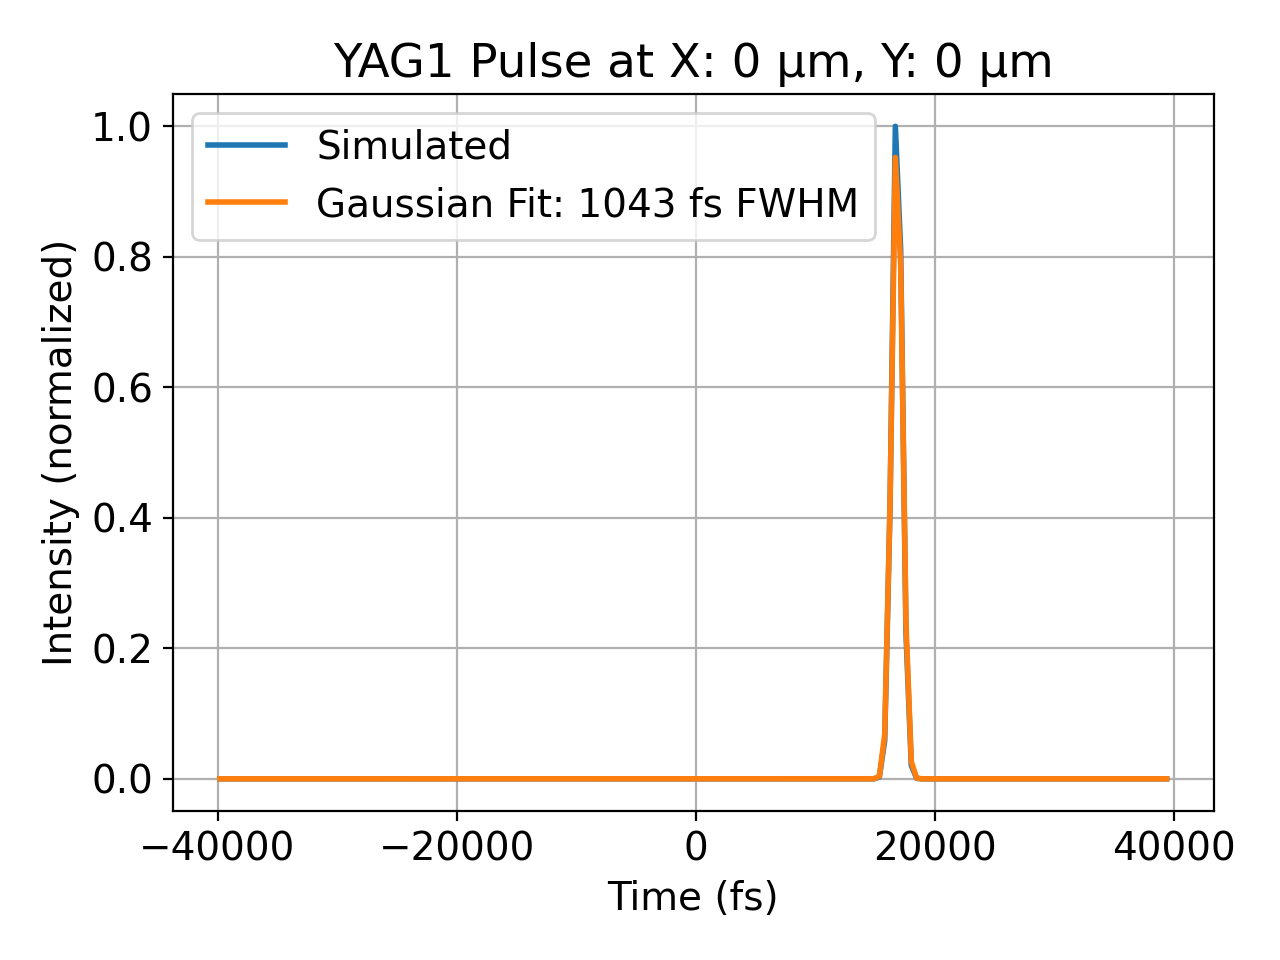

<IPython.core.display.Javascript object>


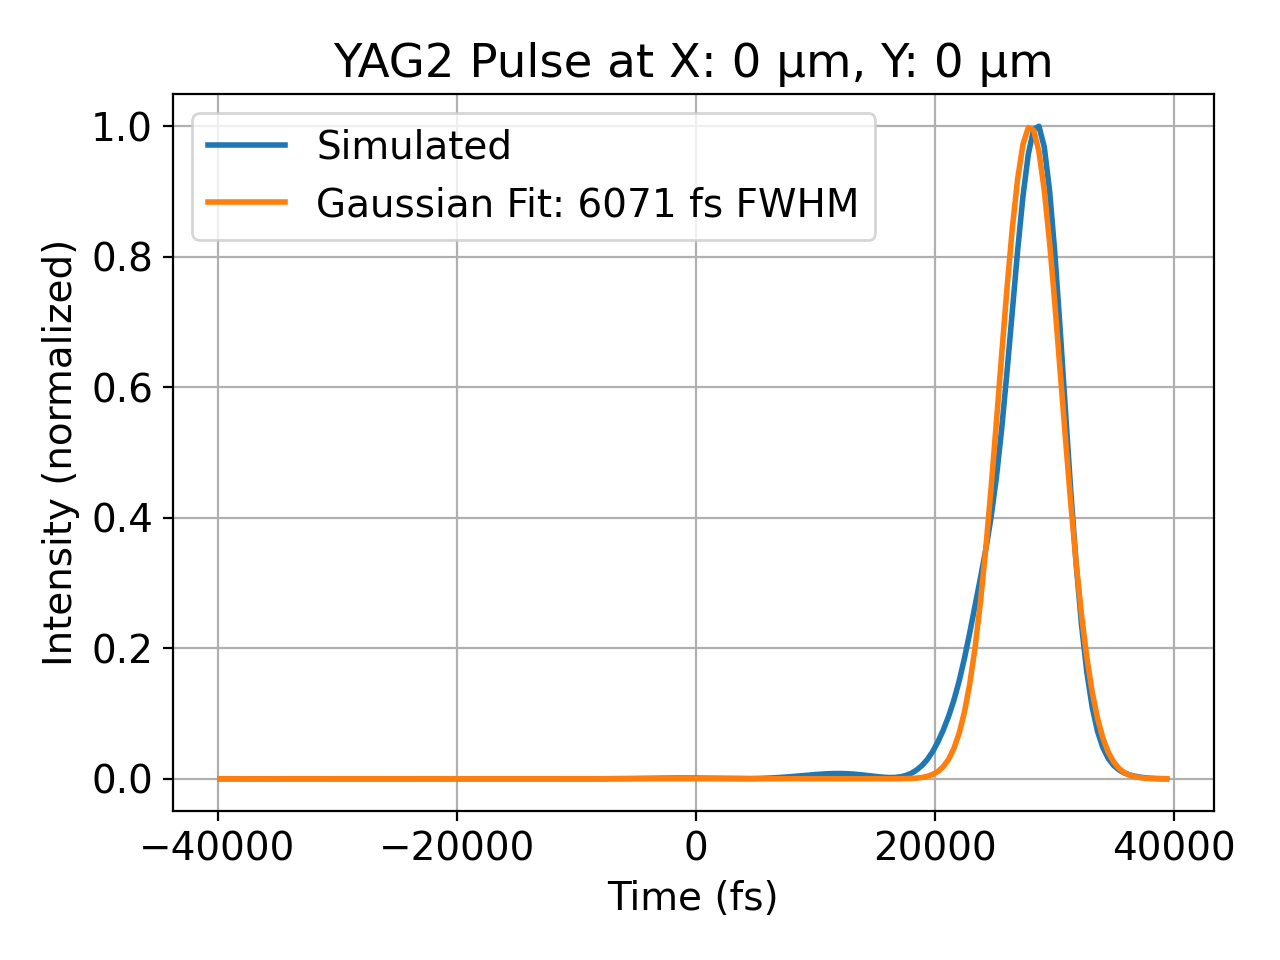

In [25]:
pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2')
pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
# pulse_test.imshow_energy_slice('IP')
# pulse_test.imshow_projection('IP')
# pulse_test.imshow_time_slice('IP')

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8